# Material Balances XVII

This Notebook begins consideration of reactor designs involving separation in recycle.

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

(example-problem-01)=
## Example Problem 01: Propane dehydrogenation with separation and recycle

You are designing a flow reactor in order to perform gas-phase propane dehydrogenation.  The purpose of this reaction is "on purpose" generation of propylene, which has historically been produced as a side product of ethylene synthesis via naphtha cracking. One of the consequences of the shale gas boom is that it greatly expanded the supply of ethane (and thus decrease the cost of ethane).  Accordingly, the majority of our ethylene production has shifted to ethane pyrolysis, which does not produce significant quantities of propylene.  Hence your interest in an on-purpose synthesis of propylene!
			
$$C_3H_8 \longleftrightarrow C_3H_6 + H_2$$

The reaction has an elementary rate law, and it is performed at $T = 500\mathrm{K}$ and $P = 8.2 \ \mathrm{atm}$. At this temperature, the forward rate constant and the concentration-based equilibrium constant, $K_C$, are:

\begin{align*}
    k_f &= 0.7  \ \textrm{min}^{-1} \\
    K_C &= 0.05 \ \textrm{mol} \ \textrm{L}^{-1}				
\end{align*}			

In [Notebook 33](https://jqbond.github.io/CEN587/Notebooks/587-N33.html#example-problem-02), we found that it is not possible to reach 95% conversion of propane under the specified conditions $(T = 500\mathrm{K} \ \mathrm{and} \ P = 8.2 \ \mathrm{atm})$. Equilibrium limitations restrict the maximum propane conversion to $X_A \approx 0.45$. We attempted to handle this by pressure reduction and dilution, and we foiund that it is necessary to reduce pressure to $P = 1 \mathrm{atm}$ and add a diluent at $F_{If} = 100 \ \mathrm{mol \ min^{-1}}$ in order to exceed $X_A = 0.95$. This *does* solve the equilibrium constraint, but the extreme dilution means that rates of dehydrogenation are very low, and we only achieve the target conversion as the PFR volume approaches 30,000L. 

In this example problem, we will try a different approach for mitigating the equilibrium constrain. We will design a separation-and-recycle process. The basic idea is that we will operate the dehydrogenation reactor (a PFR) at a relatively low single pass conversion. We will then separate the propylene out and recycle a fraction of the unreacted propane back to the reactor influent. In this way, we will achieve a higher overall conversion at the process level even though the reactor continues to operate at a low single pass conversion that cannot exceed the equilibrium limit for these conditions $(X_A \approx 0.45)$. 

Since this is our first attempt at a recycle process, we envision a relatively simple PFD (see figure below). Conceptually, we will design the system so that the fresh propane feed into the process is combined with unconverted, recycled propane from the reactor in a mixer. This combined propane feed goes into a PFR, where it is partially converted to $H_2$ and $C_3H_6$. the effluent from the reactor goes into a separator. For simplicity, we will assume propane is perfectly separated from $H_2$ and $C_3H_6$ inside of the separator -- otherwise, we need to consider separator design, which is outside of our scope in this course and would be covered in a unit operations course. Finally, the unreacted propane enters a splitter, and a fraction of it $(\alpha)$ is recycled back to the mixer. The remaining quantity of propane is purged and exits the process. This is illustrated below:

```{figure} ../Images/PFRRecycle.jpg
---
height: 400px
name: PFRRecycle
---
Separation with recycle for propane dehydrogenation
```

Rate and equilibrium constants remain the same as those in [Notebook 33](https://jqbond.github.io/CEN587/Notebooks/587-N33.html#example-problem-02) because we haven't changed the temperature. The propane feed to the entire process, $F_{A0}$, remains 10 moles per minute. The PFR will operate at 8.2 atm.

\begin{align*}
    k_f  &= 0.7  \ \textrm{min}^{-1} \\
    K_C &= 0.05 \ \textrm{mol} \ \textrm{L}^{-1}\\	
\end{align*}			

1. Find the minimum recycle ratio required to achieve an overall conversion of $X_A = 0.95$ in the process described above
2. For this recycle ratio, calculate the PFR volume required to achieve this overall, process-level conversion of $X_A = 0.95$

### Solution to Example Problem 01

We'll start by writing balances on species A (propane) for the process and/or various unit operations and see where that gets us...there are many potential strategies, and in the end, we really just need to make sure that we write a balance on each unit. For this problem, I find it easiest to start with a balance on the overall process and on the splitter. Because of the way that I've written the problem, analytical solution is possible, and (for me) it is easiest to proceed this way.

#### Analysis of the overall process

If we draw a black box around the whole process, we know that it must achieve 95% conversion of the propane fed into the process at a flowrate of 10 mol/min. We can therefore define the exit flowrate of propane in terms of the inlet flowrate and the overall conversion

$$F_{A4} = F_{A0}\left(1 - X_{A_{ov}}\right)$$

```{note}
Because of the specifications made in this problem (we have specified the overall conversion), we can immediately calculate $F_{A4} = 0.5 \ \mathrm{mol \ min^{-1}}$, which makes determining flowrates into and out of each unit operation smooth and sequential. Recycle problems at not always this straightforward.
```

#### Analysis of the Splitter

A balance on the splitter gives:

$$0 = F_{A3} - F_{A4} - F_{A5}$$

We can express the recycle flowrate as a fraction of the flow into the splitter, i.e., 

$$F_{A5} = \alpha F_{A3}$$

Substituting this into the splitter balance, we find:

$$0 = F_{A3} - F_{A4} - \alpha F_{A3}$$

We can solve for $F_{A3}$ to find:

$$F_{A3} = \frac{1}{1 - \alpha}F_{A4}$$

And we can substitute this back into the definition for $F_{A5}$:

$$F_{A5} = \frac{\alpha}{1 - \alpha} F_{A4}$$

```{note}
We now have pretty clear definitions for $F_{A3}$ and $F_{A5}$. Upon inspection of these definitions, it should become clear that, because we know that $F_{A4} = 0.5 \ \mathrm{mol \ min^{-1}}$ for this process, we can calculate both $F_{A3}$ and $F_{A5}$ as soon as we specify the value of the recycle ratio, $\alpha$. One can then imagine an iterative operation wherein we pass trial values of $\alpha$ to these functions and calculate the resultant values for $F_{A3}$ and $F_{A5}$. 
```

#### Analysis of the separator

A balance on the separator is straightforward and tells us that:

$$F_{A2} = F_{A3}$$

```{note}
Following the insight above, we know that once we specify $\alpha$, $F_{A3}$ is determined. This means that specification of $\alpha$ also determines $F_{A2}$.
```

#### Analysis of the mixer

A balance on the mixer gives us the combined feed rate into the reactor, $F_{A1}$

$$F_{A1} = F_{A0} + F_{A5}$$

```{note}
We already know $F_{A0}$ -- this is the feed rate of fresh propane into the process. Reflecting on the above insights, we know that specifying $\alpha$ determines $F_{A5}$, so it also determines $F_{A1}$
```

#### Analysis of the reactor 

If we look at the reactor, we can define a single pass fractional conversion in terms of $F_{A1}$ and $F_{A2}$, both of which are determiend once we specify a trial value for $\alpha$.

$$X_{SP} = \frac{F_{A1} - F_{A2}}{F_{A1}}$$

We have not specified $\alpha$ yet, so we still have a degree of freedom in the system and we cannot solve all of these equations. Before proceeding, review the equations and notes above, and convince yourself that, once we specify the recycle ratio, $\alpha$, all flowrates in this process are fully determined, and we can solve for the single pass conversion through the PFR. 

In the code cell below, we will create a function that takes the recycle ratio as an argument and returns all of the process flowrates as well as the single pass and overall conversion.

One approach to determine the recycle ratio required to achieve an overall conversion of $X_A = 0.95$ is to iteratively test values for the recycle ratio until we find one that will allow for a permissible single pass conversion in the PFR. By this, we mean a single pass conversion that is below the equilibrium limit, which we know is $X_A \approx 0.45$ for a pure propane feed, $T = 500K$ and $P = 8.2 \ \mathrm{atm}$. so we just have to find a recycle ratio that will allow us to operate with a PFR below 44% conversion.

```{note}
The nature of the specifications make this problem pretty straightforward, and we find that we can solve it using simple methods -- paper, pencil, and calculator would be fine! There are other ways that we might have specified the problem, and they can make the analysis much more complex and force us to use relatively advanced numerical solutions. We will cover more of these in [Notebook 35](https://jqbond.github.io/CEN587/Notebooks/587-N35.html).
```

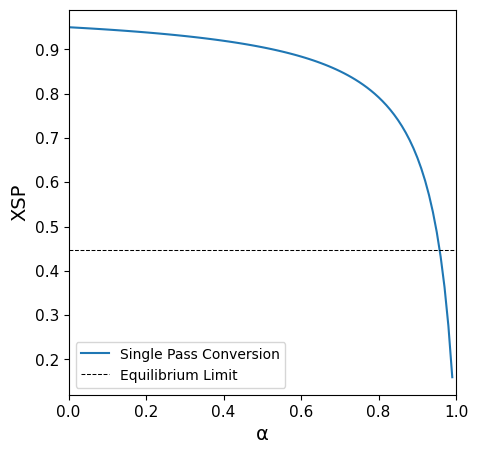

α   =  0.96
FA0 = 10.00 mol/min
FA1 = 22.00 mol/min
FA2 = 12.50 mol/min
FA3 = 12.50 mol/min
FA4 =  0.50 mol/min
FA5 = 12.00 mol/min
XSP =  0.43
XOV =  0.95

 if α = 0.960, we need a single pass conversion of XSP = 0.432 to achieve an overall conversion of XOV = 0.950
α   =  0.96
FA0 = 10.00 mol/min
FA1 = 22.00 mol/min
FA2 = 12.50 mol/min
FA3 = 12.50 mol/min
FA4 =  0.50 mol/min
FA5 = 12.00 mol/min
XSP =  0.43
XOV =  0.95

 if α = 0.957, we need a single pass conversion of XSP = 0.447 to achieve an overall conversion of XOV = 0.950


In [62]:
###########################################################################
# Global constants for P01                                                #
###########################################################################

kf  = 0.7  #1/min
KC  = 0.05 #mol/L
kr  = kf/KC #L/mol/min
T   = 500 #K
P   = 8.2 #atm
R   = 0.08206 #L*atm/mol/K
FA0 = 10.0 #mol/min
FB0 = 0.0
FC0 = 0.0
XEQ = 0.447
XAP = 0.950

##########################################################################
# Define a function to calculate flowrates and conversions for a given α #
##########################################################################

def recycle(α):
    FA4 = FA0*(1 - XAP)
    FA3 = FA4/(1 - α)
    FA2 = FA3
    FA5 = α*FA3
    FA1 = FA0 + FA5
    XSP = (FA1 - FA2)/FA1
    XOV = (FA0 - FA4)/FA0
    return [α, FA0, FA1, FA2, FA3, FA4, FA5, XSP, XOV]

##########################################################################
# Execute the recycle function for many values of α; store XSP for each  #
##########################################################################

aset = np.linspace(0, 0.99, 100)
xset = np.zeros(len(aset),)
for i, a in enumerate(aset):
    xset[i] = recycle(a)[7]


##########################################################################
# Graph XSP vs α                                                         #
##########################################################################
plt.figure(figsize = (5, 5))
plt.plot(aset, xset, label = 'Single Pass Conversion')
plt.hlines(0.447, 0, 1, linestyle = 'dashed', color = 'black', linewidth = 0.75, label = 'Equilibrium Limit')
plt.xlim(0.0, 1)
plt.xticks(fontsize = 11)
plt.xlabel('α', fontsize = 14)
plt.yticks(fontsize = 11)
plt.ylabel('XSP', fontsize = 14)
plt.legend(loc = 'lower left')
plt.show()

##########################################################################
# Locate α where XSP < 0.447 by trial and error                          #
##########################################################################

αtrial = 0.96
α, FA0, FA1, FA2, FA3, FA4, FA5, XSP, XOV = recycle(αtrial)
values = [α, FA0, FA1, FA2, FA3, FA4, FA5, XSP, XOV]
labels = ['α', 'FA0', 'FA1', 'FA2', 'FA3', 'FA4', 'FA5', 'XSP', 'XOV']

for label, value in zip(labels, values):
    if label == 'XSP' or label == 'XOV' or label == 'α':
        print(f'{label:3s} = {value:5.2f}')
    else:
        print(f'{label:3s} = {value:5.2f} mol/min')
print(f'\n if α = {αtrial:4.3f}, we need a single pass conversion of XSP = {XSP:4.3f} to achieve an overall conversion of XOV = {XOV:4.3f}')

#########################################################################
# Define an objective function f(α) = XSP - XAEQ                        #
# solve for value of α where XAP = XEQ
#########################################################################

obj01 = lambda α: recycle(α)[7] - XEQ
ans01 = opt.newton(obj01, 0.9)
αreq  = ans01

α, FA0, FA1, FA2, FA3, FA4, FA5, XSP, XOV = recycle(αreq)
labels = ['α', 'FA0', 'FA1', 'FA2', 'FA3', 'FA4', 'FA5', 'XSP', 'XOV']

for label, value in zip(labels, values):
    if label == 'XSP' or label == 'XOV' or label == 'α':
        print(f'{label:3s} = {value:5.2f}')
    else:
        print(f'{label:3s} = {value:5.2f} mol/min')
print(f'\n if α = {αreq:4.3f}, we need a single pass conversion of XSP = {XSP:4.3f} to achieve an overall conversion of XOV = {XOV:4.3f}')

#### Solve the Material Balance for a lower target single pass conversion

Once we have determined a value for recycle ratio that will allow the PFR to operate below $X_A \approx 0.447$ (the equilibrium limit), we can solve determine the flows into and out of the PFR and and determine necessary reactor size for a given single pass conversion. Let's pick a recycle ratio of $α = 0.96$. We know this a recycle ratio of 0.957 will allow the PFR to operate exactly at the equilibrium limit and still achieve an overall conversion of $X_A = 0.95$. The challenge with doing this is that reaching equilibrium is essentially the same as reaching 100% conversion -- it requires an infinitely large reactor because the rate of reaction goes to zero as the system approaches equilibrium (or complete conversion). If we choose a slightly higher recycle ratio of $α = 0.96$, we can run the PFR slightly below the equilibrium limit, which is feasible. Running at higher recycle ratios will allow us to operate the PFR at lower single pass conversion; however, the tradeoff is that we will be recycling an processing larger volumes of fluid. 

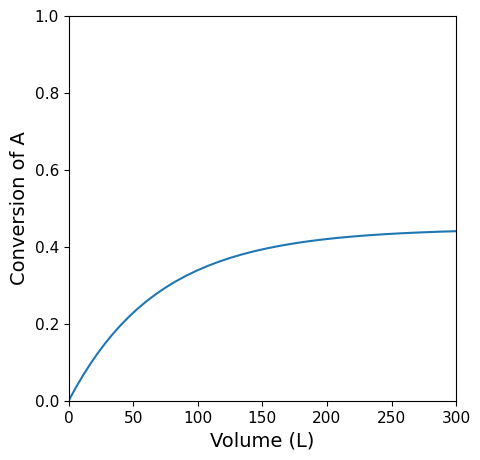

The Volume required for a PFR single pass conversion of XA = 0.432 is 242L


In [64]:
###################################################################
# Define the ODE system as f(V, [FA, FB, FC])                     #
# function will return [dFAdV, dFBdV, dFCdV]                      #
###################################################################

def P02(V, var):
    FA, FB, FC = var

    FT = FA + FB + FC
    
    Q  = FT*R*T/P
    
    CA = FA/Q
    CB = FB/Q
    CC = FC/Q
    
    r  = kf*CA - kr*CB*CC
    
    RA = -r
    RB =  r
    RC =  r
    
    dA = RA
    dB = RB
    dC = RC
    
    return [dA, dB, dC]

####################################################################
# Calculate all flowrates for desired recycle ratio                #
####################################################################

α = 0.96
α, FA0, FA1, FA2, FA3, FA4, FA5, XSP, XOV = recycle(α)

####################################################################
# Define the integration span and initial state of each variable   #
####################################################################

Vspan = (0.0, 300.0)
var0  = (FA1, 0.0, 0.0)

####################################################################
# Integrate the ODE system using solve_ivp()                       #
####################################################################

ans02  = solve_ivp(P02, Vspan, var0, atol = 1e-8, rtol =  1e-8)

####################################################################
# Extract important data from the solution structure               #
####################################################################

V     = ans02.t
FA    = ans02.y[0]
FB    = ans02.y[1]
FC    = ans02.y[2]

####################################################################
# Calculate fractional conversions                                 #
####################################################################

XA    = (FA1 - FA)/FA1

#################################################################################################
# Graph XA vs. Volume -- why does XA stop increasing even though the reactor is getting larger? #
#################################################################################################

plt.figure(figsize = (5, 5))
plt.plot(V, XA)
plt.xlim(0.0, max(Vspan))
plt.xticks(fontsize = 11)
plt.xlabel('Volume (L)', fontsize = 14)
plt.ylim(0.0, 1.0)
plt.yticks(fontsize = 11)
plt.ylabel('Conversion of A', fontsize = 14)
plt.show()

####################################################################
# Construct interpolating polynomial approximation for V(XA)       #
# Attempt to find V(XSP)                                           #
####################################################################

itp1 = interp1d(XA, V)
print(f'The Volume required for a PFR single pass conversion of XA = {XSP:0.3f} is {itp1(XSP):0.0f}L')